In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
import sys
import os

if not ".." in sys.path:
    sys.path.append("..")

In [18]:
from datasets.ImageNet.ImageNetDataset import ImageNet
from time import time

import matplotlib.pyplot as plt
import numpy as np

In [28]:
start = time()
root = "/datashare/ImageNet/ILSVRC2012"
dst_meta_path = (
    "/home/soroush1/projects/def-kohitij/soroush1/pretrain-imagenet/data/ImageNet"
)
train_dataset = ImageNet(root=root, split="train", dst_meta_path=dst_meta_path)
print(f"total time: {abs(time() - start)}s")

root = '/datashare/ImageNet/ILSVRC2012'
split = 'train'
total time: 15.582927703857422s


In [30]:
train_dataset

Dataset ImageNet
    Number of datapoints: 1281167
    Root location: /datashare/ImageNet/ILSVRC2012
    Split: train

In [29]:
start = time()
root = "/datashare/ImageNet/ILSVRC2012"
dst_meta_path = (
    "/home/soroush1/projects/def-kohitij/soroush1/pretrain-imagenet/data/ImageNet"
)
val_dataset = ImageNet(root=root, split="validation", dst_meta_path=dst_meta_path)
print(f"total time: {abs(time() - start) * 1000}s")

root = '/datashare/ImageNet/ILSVRC2012'
split = 'validation'
total time: 503.1931400299072s


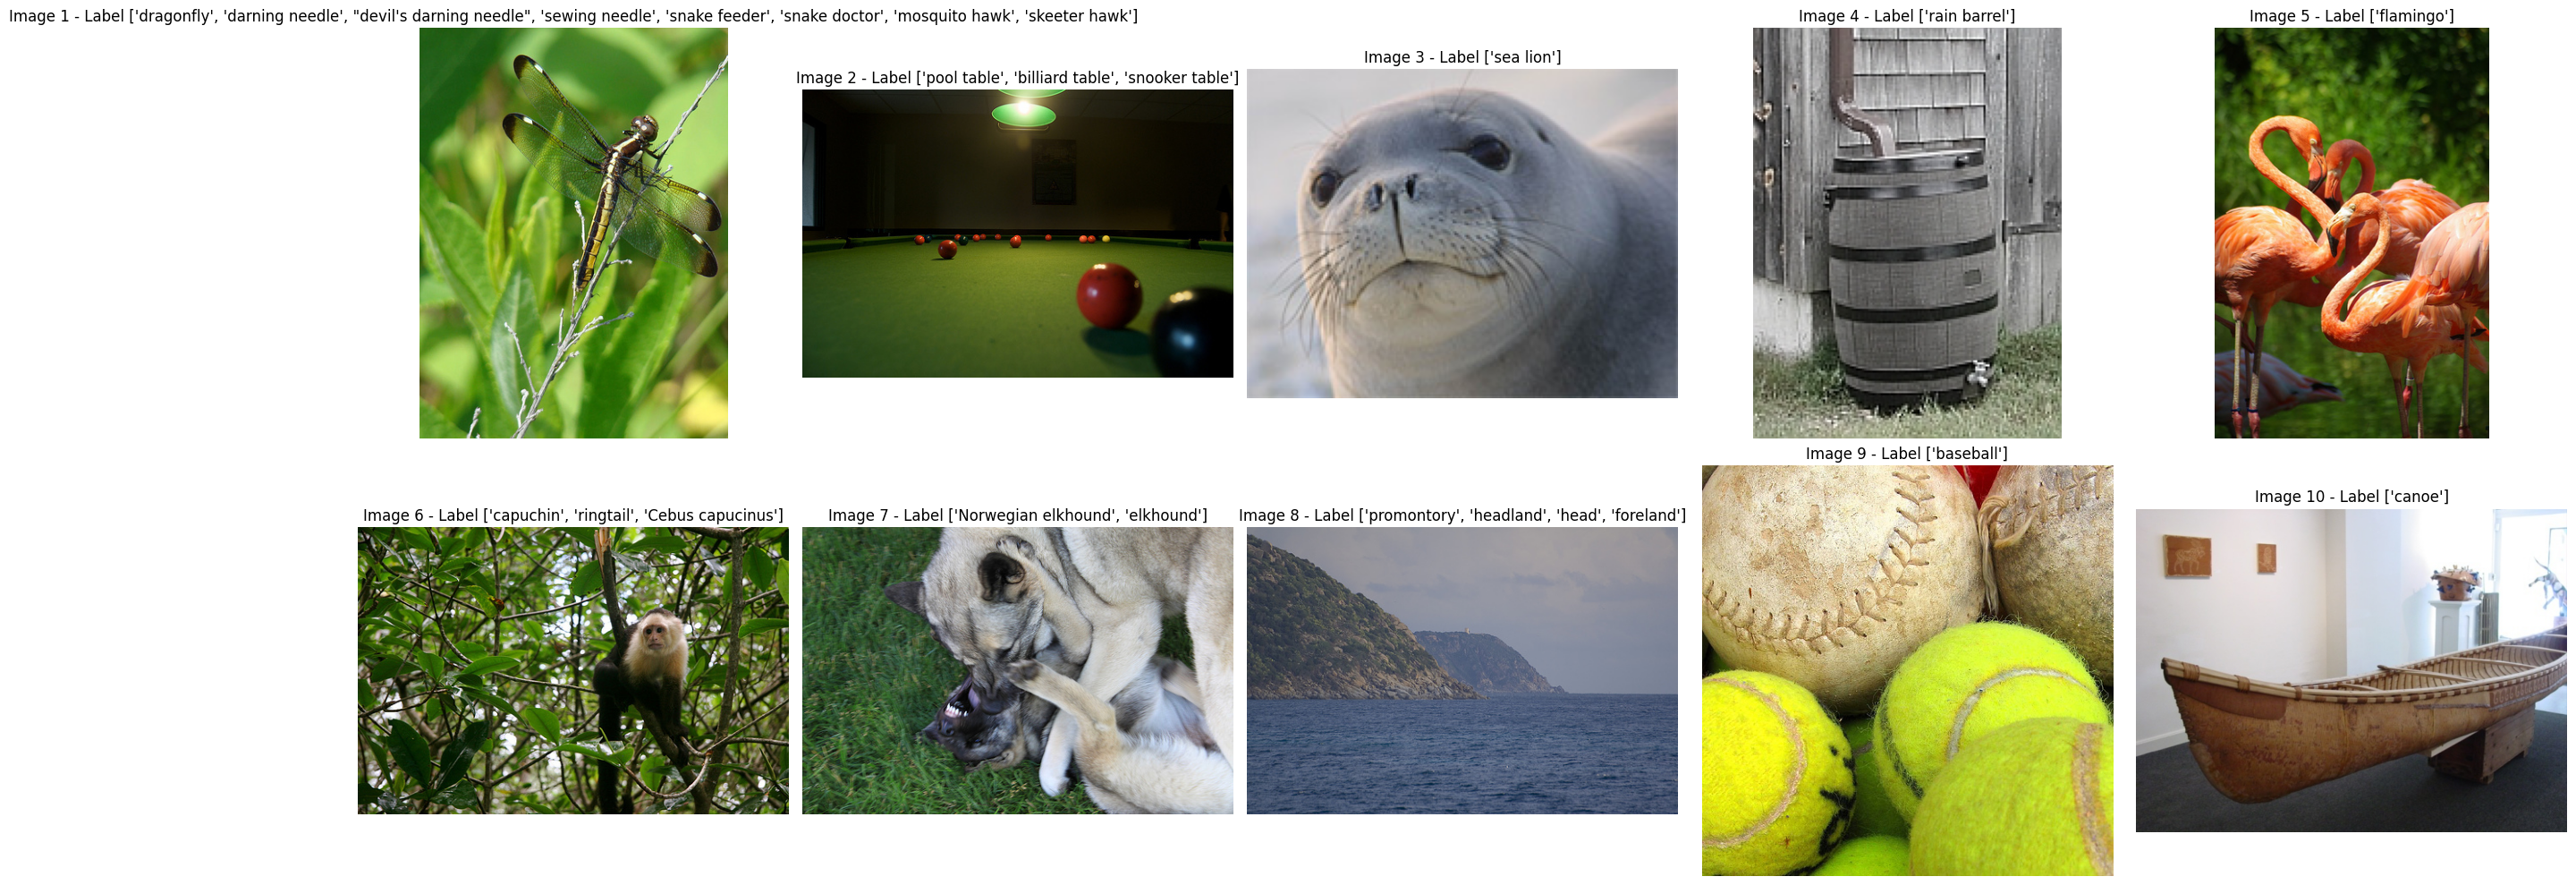

In [31]:
def idx_to_class(dataset, label):
    return [key for key, value in train_dataset.class_to_idx.items() if value == label]


random_idx = np.random.randint(0, len(train_dataset), 10)

plt.figure(figsize=(25, 10))

for i, idx in enumerate(random_idx):

    img, label = train_dataset[idx]

    plt.subplot(2, 5, i + 1)  # Adjust subplot layout as needed
    plt.imshow(img)

    plt.title(f"Image {i+1} - Label {idx_to_class(train_dataset, label)}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [36]:
from lit_modules.litdatamodules.lit_imagenet import LitImageNetDataModule

In [37]:
root = "/datashare/ImageNet/ILSVRC2012"
meta_path = (
    "/home/soroush1/projects/def-kohitij/soroush1/pretrain-imagenet/data/ImageNet"
)

start = time()
lit_data_modules = LitImageNetDataModule(
    root=root,
    meta_path=meta_path,
    num_workers=10,
    batch_size=32,
    desired_image_size=224,
)

lit_data_modules.setup("train")
print(f"total time: {abs(time() - start) * 1000}s")

total time: 4551.378488540649s


In [39]:
train_dl = lit_data_modules.train_dataloader()

In [42]:
x, y = next(iter(train_dl))
x.size(), y.size()

(torch.Size([32, 3, 224, 224]), torch.Size([32]))